In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

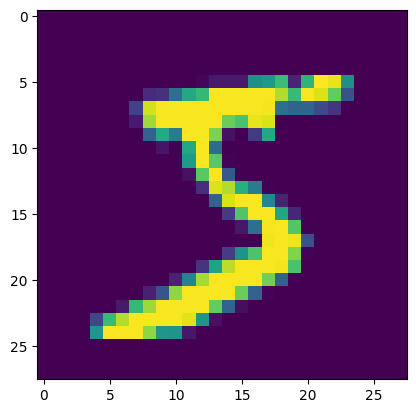

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])


In [9]:
X_train=X_train/255
X_test=X_test/255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [41]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [44]:
history=model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8509 - loss: 0.5000 - val_accuracy: 0.9563 - val_loss: 0.1472
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9635 - loss: 0.1240 - val_accuracy: 0.9612 - val_loss: 0.1250
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9759 - loss: 0.0787 - val_accuracy: 0.9698 - val_loss: 0.1017
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9810 - loss: 0.0626 - val_accuracy: 0.9729 - val_loss: 0.0932
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9864 - loss: 0.0440 - val_accuracy: 0.9745 - val_loss: 0.0884
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9887 - loss: 0.0346 - val_accuracy: 0.9746 - val_loss: 0.1005
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9908 - loss: 0.0287 - val_accuracy: 0.9722 - val_loss: 0.0951
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9924 - loss: 0.0239 

In [45]:
y_prob=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [46]:
y_prob

array([[4.0498951e-19, 2.3435245e-11, 3.4495956e-10, ..., 9.9999994e-01,
        2.1534716e-13, 9.4252705e-12],
       [1.3582395e-17, 4.9439952e-10, 9.9999994e-01, ..., 4.9870891e-17,
        1.3429893e-13, 1.0137425e-30],
       [3.7224046e-10, 9.9999815e-01, 2.9058889e-09, ..., 1.6344014e-06,
        1.6886300e-07, 7.6816965e-13],
       ...,
       [1.3223826e-28, 1.5166880e-18, 1.3937764e-28, ..., 2.7703981e-12,
        9.2311411e-17, 4.4903629e-12],
       [1.8089258e-34, 8.1167753e-30, 3.7159851e-32, ..., 2.1264993e-25,
        5.4056336e-17, 1.2427374e-28],
       [1.2429957e-17, 6.0189103e-23, 1.3318862e-19, ..., 1.7189692e-23,
        8.6041925e-20, 2.9513806e-27]], dtype=float32)

In [47]:
y_pred=y_prob.argmax(axis=1)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9796

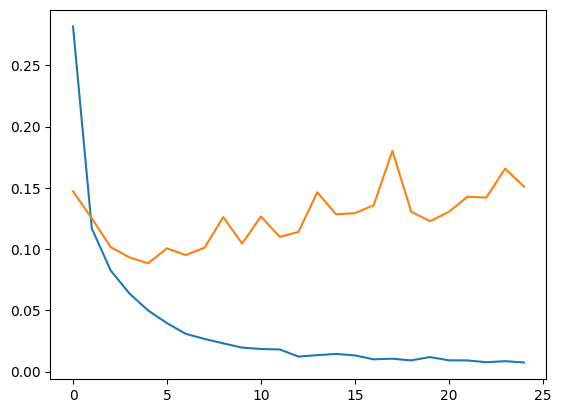

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


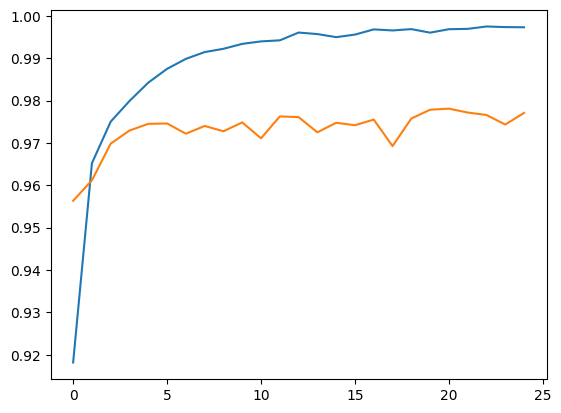

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

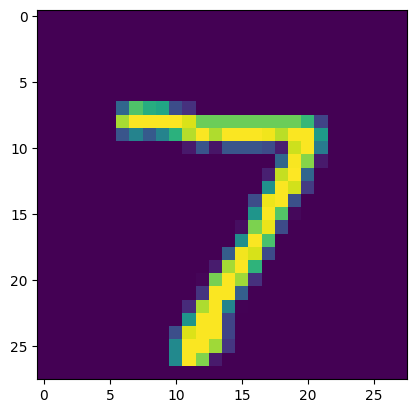

In [52]:
plt.imshow(X_test[0])

In [56]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([7])